In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [8]:
def f(x):
    return 3*x**2 - 4*x + 8

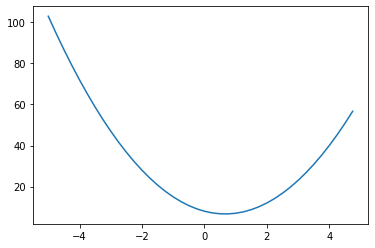

In [10]:
xs = np.arange(-5 , 5 , 0.25)
ys = f(xs)
plt.plot(xs , ys)

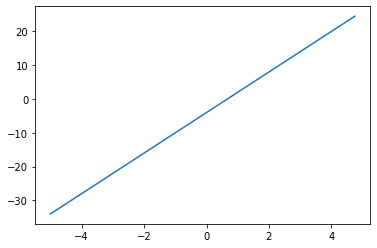

In [18]:
h = 0.0000001
d = ( f(np.add(xs,h)) - f(xs) )/h
plt.plot(xs, d)

In [22]:
def diff(x):
    return 6*x - 4
diff_ys = diff(xs)
diff_ys = diff_ys - d
diff_ys

array([-1.71106876e-07, -8.20546120e-08, -1.35110895e-07, -1.88167178e-07,
       -3.83332008e-07, -2.94279744e-07, -3.47336027e-07, -4.00392310e-07,
       -3.11340045e-07, -3.64396328e-07, -3.46398338e-07, -3.28400347e-07,
       -3.10402356e-07, -2.92404366e-07, -2.74406375e-07, -2.91935521e-07,
       -3.09464667e-07, -3.09230245e-07, -3.08995823e-07, -2.90997832e-07,
       -2.99645194e-07, -2.99410772e-07, -2.99176349e-07, -2.98941927e-07,
       -2.98707505e-07, -3.07354867e-07, -3.07120445e-07, -2.89122454e-07,
       -2.88888032e-07, -3.06417178e-07, -2.70655619e-07, -2.52657628e-07,
       -3.05713911e-07, -2.87715920e-07, -2.69717930e-07, -2.51719939e-07,
       -3.75830496e-07, -4.28886779e-07, -3.39834514e-07, -2.50782250e-07])

In [25]:
a = 2.0
b = -3.0
c = 10.0
d= a*b + c

h=0.00000001
d_a = (((a+h)*b + c) - (a*b + c))/h
d_b = ((a*(b+h) + c) - (a*b + c))/h
d_c = ((a*b + c+h) - (a*b + c))/h

print(d_a , d_b , d_c)

-2.999999981767587 1.999999987845058 0.999999993922529


In [31]:
class Value:
    def __init__(self , data , _children=() , _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self , other):
        out = Value(self.data + other.data , (self , other) , '+')
        return out
    
    def __mul__(self , other):
        out = Value(self.data * other.data , (self , other) , '*')
        return out

In [33]:
a = Value(2.0)
b = Value(-3.0)
c= Value(10.0)

d = a*b+c
d._op

'+'

In [ ]:
from graphviz import Digraph

def trace(root):
    nodes , edges = set() , set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child , v))
                build(child)
    build(root)
    return nodes , edges

def draw_dot(root):
    dot = Digraph(format='svg' , graph_attr={'rankdir':'LR'})

    nodes , edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot